# Creating, reading, and writing reference

This is the reference component to the "Creating, reading, and writing" section of the tutorial. 

The very first step in any data analytics project will probably reading the data out of a file somewhere, so it makes sense that that's the first thing we'd need to cover. In this section, we'll look at exercises on creating `pandas` `Series` and `DataFrame` objects, both by hand and by reading data from disc.

The [IO Tools](http://pandas.pydata.org/pandas-docs/stable/io.html) section of the official `pandas` docs provides a comprehensive overview on this subject.

In [1]:
import pandas as pd

## Creating data

There are two core objects in `pandas`: the **DataFrame** and the **Series**.

A DataFrame is a table. It contains an array of individual *entries*, each of which has a certain *value*. Each entry corresponds with a row (or *record*) and a *column*.

For example, consider the following simple `DataFrame`:

In [2]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

`DataFrame` entries are not limited to integers. For instance, here's a `DataFrame` whose values are `str` strings:

In [3]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


We are using the `pd.DataFrame` constructor to generate these `DataFrame` objects. The syntax for declaring a new one is a dictionary whose keys are the column names (`Bob` and `Sue` in this example), and whose values are a list of entries. This is the standard way of constructing a new `DataFrame`, and the one you are likliest to encounter.

The dictionary-list constructor assigns values to the *column labels*, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the *row labels*. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a `DataFrame` is known as an **Index**. We can assign values to it by using an `index` parameter in our constructor:

In [4]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


A Series, by contrast, is a sequence of data values. If a `DataFrame` is a table, a `Series` is a list. And in fact you can create one with nothing more than a list:

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A `Series` is, in essence, a single column of a `DataFrame`. So you can assign column values to the `Series` the same way as before, using an `index` parameter. However, a `Series` do not have a column name, it only has one overall `name`:

In [6]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

`Series` and the `DataFrame` are intimately related. It's helpful to think of a `DataFrame` as actually being just a bunch of `Series` "glue together". We'll see more of this in the next section of this tutorial.

## Reading common file formats

Being able to create a `DataFrame` and `Series` by hand is handy. But, most of the time, we won't actually be creating our own data by hand, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```csv
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11
```

So a CSV file is a table of values separated by commas. Hence the name: "comma-seperated values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a `DataFrame`. We'll use the `read_csv` function to read the data into a `DataFrame`. This goes thusly:

In [2]:
wine_reviews = pd.read_csv("../input/winemag-data-130k-v2.csv")

We can use the `shape` attribute to check how large the resulting `DataFrame` is:

In [8]:
wine_reviews.shape

(129971, 14)

So our new `DataFrame` has 130,000 records split across 14 different columns. That's almost 2 million entries!

We can examine the contents of the resultant `DataFrame` using the `head` command, which grabs the first five rows:

In [9]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


The `pandas` `read_csv` function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the `csv` file has an in-built index, which `pandas` did not pick up on automatically. To make `pandas` use that column for the index (instead of creating a new one from scratch), we may specify and use an `index_col`.

In [10]:
wine_reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Let's look at a few more datatypes you're likely to encounter.

First up, the venerable Excel spreadsheet. An Excel file (`XLS` or `XLST`) organizes itself as a sequence of named sheets. Each sheet is basically a table. So to load the data into `pandas` we need one additional parameter: the name of the sheet of interest.

So this:

![](https://s3.amazonaws.com/nonwebstorage/excel.png)

Becomes this:

<!-- First up, the venerable SQL database. You can read a single table in a SQL database directly into a `pandas` `DataFrame` using the `read_sql` method. The only thing you need is -->

In [11]:
!pip install xlrd openpyxl
wic = pd.read_excel("../input/WICAgencies2013ytd.xls", 
                    sheet_name='Total Women')
wic.head()

,WIC PROGRAM -- TOTAL NUMBER OF WOMEN PARTICIPATING,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,FISCAL YEAR 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Data as of December 07, 2018",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State Agency or Indian Tribal Organization,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,Average Participation
4,Connecticut,11891,11763,11328,11786,11159,11070,11379,11666,11387,11587,11570,11376,11496.8


As you can see in this example, Excel files are often not formatted as well as CSV files are. Spreadsheets allow (and encourage) creating notes and fields which are human-readable, but not machine-readable.

So before we can use this particular dataset, we will need to clean it up a bit. We will see how to do so in the next section.

For now, let's move on to another common data format: SQL files.

SQL databases are where most of the data on the web ultimately gets stored. They can be used to store data on things as simple as recipes to things as complicated as "almost everything on the Kaggle website".

Connecting to a SQL database requires a lot more thought than reading from an Excel file. For one, you need to create a **connector**, something that will handle siphoning data from the database.

`pandas` won't do this for you automatically because there are many, many different types of SQL databases out there, each with its own connector. So for a SQLite database (the only kind supported on Kaggle), you would need to first do the following (using the `sqlite3` library that comes with Python):

In [12]:
import sqlite3
conn = sqlite3.connect("../input/FPA_FOD_20170508.sqlite")

The other thing you need to do is write a SQL statement. Internally, SQL databases all operate very differently. Externally, however, they all provide the same API, the "Structured Query Language" (or...SQL...for short).

We (very briefly) need to use SQL to load data into 

For the purposes of analysis however we can usually just think of a SQL database as a set of tables with names, and SQL as a minor inconvenience in getting that data out of said tables.

So, without further ado, here is all the SQL you have to know to get the data out of `SQLite` and into `pandas`:

In [13]:
fires = pd.read_sql_query("SELECT * FROM fires", conn)

Every SQL statement begins with `SELECT`. The asterisk (`*`) is a wildcard character, meaning "everything", and `FROM fires` tells the database we want only the data from the `fires` table specifically.

And, out the other end, data:

In [14]:
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


## Writing common file formats

Writing data to a file is usually easier than reading it out of one, because `pandas` handles the nuisance of conversions for you. 

We'll start with CSV files again. The opposite of `read_csv`, which reads our data, is `to_csv`, which writes it. With CSV files it's dead simple:

In [15]:
wine_reviews.head().to_csv("../input/wine_reviews.csv")

To write an Excel file back you need `to_excel` and the `sheet_name` again:

In [16]:
wic.to_excel('../input/wic.xlsx', sheet_name='Total Women')

And finally, to output to a SQL database, supply the name of the table in the database we want to throw the data into, and a connector:

In [17]:
conn = sqlite3.connect("fires.sqlite")
fires.head(10).to_sql("fires1", conn)

OperationalError: attempt to write a readonly database

Painless!

# Indexing, selecting, assigning reference

This is the reference component to the "Indexing, selecting, assigning" section of the Advanced Pandas track. 

In [18]:
import pandas as pd
reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
pd.set_option("display.max_rows", 5)

Selecting specific values of a `pandas` `DataFrame` or `Series` to work on is an implicit step in almost any data operation you'll run. Hence a solid understanding of how to slice and dice a dataset is vital.

## Naive accessors

Native Python objects provide many good ways of indexing data. `pandas` carries all of these over, which helps make it easy to start with.

Consider this `DataFrame`:

In [19]:
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In Python we can access the property of an object by accessing it as an attribute. A `book` object, for example, might have a `title` property, which we can access by calling `book.title`. Columns in a `pandas` `DataFrame` work in much the same way. 

Hence to access the `country` property of our `reviews` we can use:

In [20]:
reviews.country

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

If we have a `dict` object in Python, we can access its values using the indexing (`[]`) operator. Again, we can do the same with `pandas` `DataFrame` columns. It "just works":

In [21]:
reviews['country']

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

These are the two ways of selecting a specific columnar `Series` out of a `pandas` `DataFrame`. Neither of them is more or less syntactically valid than the other, but the indexing operator `[]` does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a `country providence` column, `reviews.country providence` wouldn't work).

Doesn't a `pandas` `Series` look kind of like a fancy `dict`? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator `[]` once more:

In [22]:
reviews['country'][0]

'Italy'

## Index-based selection

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, `pandas` has its own accessor operators, `loc` and `iloc`. For more advanced operations, these are the ones you're supposed to be using.

`pandas` indexing works in one of two paradigms. The first is **index-based selection**: selecting data based on its numerical position in the data. `iloc` follows this paradigm.

To select the first row of data in this `DataFrame`, we may use the following:

In [23]:
reviews.iloc[0]

country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object

Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:

In [24]:
reviews.iloc[:, 0]

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

On its own the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the `country` column from just the first, second, and third row, we would do:

In [25]:
reviews.iloc[:3, 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Or, to select just the second and third entries, we would do:

In [26]:
reviews.iloc[1:3, 0]

1    Portugal
2          US
Name: country, dtype: object

It's also possible to pass a list:

In [27]:
reviews.iloc[[0, 1, 2], 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the _end_ of the values. So for example here are the last five elements of the dataset.

In [28]:
reviews.iloc[-5:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Label-based selection

The second paradigm for attribute selection is the one followed by the `loc` operator: **label-based selection**. In this paradigm it's the data index value, not its position, which matters.

For example, to get the first entry in `reviews`, we would now do the following:

In [29]:
reviews.loc[0, 'country']

'Italy'

`iloc` is conceptually simpler than `loc` because it ignores the dataset's indices. When we use `iloc` we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. `loc`, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using `loc` instead. For example, here's one operation that's much easier using `loc`:

In [30]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
...,...,...,...
129969,Roger Voss,@vossroger,90
129970,Roger Voss,@vossroger,90


When choosing or transitioning between `loc` and `iloc`, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

`iloc` uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. `loc`, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that loc can index any stdlib type: strings, for example. If we have a DataFrame with index values `Apples, ..., Potatoes, ...`, and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a heck of a lot more convenient to index `df.loc['Apples':'Potatoes']` than it is to index something like `df.loc['Apples', 'Potatoet]` (`t` coming after `s` in the alphabet).

This is particularly confusing when the `DataFrame` index is a simple numerical list, e.g. `0,...,1000`. In this case `df.iloc[0:1000]` will return 1000 entries, while `df.loc[0:1000]` return 1001 of them! To get 1000 elements using `loc`, you will need to go one lower and ask for `df.iloc[0:999]`. Earlier versions of this tutorial did not point this out explicitly, leading to a lot of user confusion on some of the related answers, so we've included this note here explaining this issue.

Otherwise, the semantics of using `loc` are the same as those for `iloc`.

## Manipulating the index

Label-based selection derives its power from the labels in the index. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit.

The `set_index` method can be used to do the job. Here is what happens when we `set_index` to the `title` field:

In [31]:
reviews.set_index("title")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...
Domaine Marcel Deiss 2012 Pinot Gris (Alsace),France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Pinot Gris,Domaine Marcel Deiss
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace),France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Schoffit


Performing a `set_index` is useful if you can come up with an index for the dataset which is better than the current one.

## Conditional selection

So far we've been indexing various strides of data, using structural properties of the `DataFrame` itself. To do *interesting* things with the data, however, we often need to ask questions based on conditions. 

For example, suppose that we're interested specifically in better-than-average wines produced in Italy.

We can start by asking each wine if it's Italian or not:

In [32]:
reviews.country == 'Italy'

0          True
1         False
          ...  
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

This operation produced a `Series` of `True`/`False` booleans based on the `country` of each record.  This result can then be used inside of `loc` to select the relevant data:

In [33]:
reviews.loc[reviews.country == 'Italy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


This `DataFrame` has ~20,000 rows. The original had ~130,000. That means that around 15% of wines originate from Italy.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean wines that accrued at least 90 points.

We can use the ampersand (`&`) to bring the two questions together:

In [34]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
130,Italy,"At the first it was quite muted and subdued, b...",Bricco Rocche Brunate,91,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Brunate (Barolo),Nebbiolo,Ceretto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


Suppose we'll buy any wine that's made in Italy _or_ which is rated above average. For this we use a pipe (`|`):

In [35]:
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


`pandas` comes with a few pre-built conditional selectors, two of which we will highlight here. The first is `isin`. `isin` is lets you select data whose value "is in" a list of values. For example, here's how we can use it to select wines only from Italy or France:

In [36]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


The second is `isnull` (and its companion `notnull`). These methods let you highlight values which are or are not empty (`NaN`). For example, to filter out wines lacking a price tag in the dataset, here's what we would do:

In [37]:
reviews.loc[reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Assigning data

Going the other way, assigning data to a `DataFrame` is easy. You can assign either a constant value:

In [38]:
reviews['critic'] = 'everyone'
reviews['critic']

0         everyone
1         everyone
            ...   
129969    everyone
129970    everyone
Name: critic, Length: 129971, dtype: object

Or with an iterable of values:

In [39]:
reviews['index_backwards'] = range(len(reviews), 0, -1)
reviews['index_backwards']

0         129971
1         129970
           ...  
129969         2
129970         1
Name: index_backwards, Length: 129971, dtype: int64

We will see much more `DataFrame` assignment going on in later sections of this tutorial.

# Summary functions and maps reference

This is the reference component to the "Summary functions and maps" section of the Advanced Pandas tutorial. 

This section overlaps with the comprehensive [Essential Basic Functionality](https://pandas.pydata.org/pandas-docs/stable/basics.html) section of the official `pandas` documentation.

In [40]:
import pandas as pd
pd.set_option('max_rows', 5)
import numpy as np
reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Summary functions

`pandas` provides many simple "summary functions" (not an official name) which restructure the data in some useful way. For example, consider the `describe` method:

In [41]:
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the `dtype` of the input. The output above only makes sense for numerical data; for string data here's what we get:

In [42]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

If you want to get some particular simple summary statistic about a column in a `DataFrame` or a `Series`, there is usually a helpful `pandas` function that makes it happen. For example, to see the mean of the points allotted (e.g. how well an averagely rated wine does), we can use the `mean` function:

In [43]:
reviews.points.mean()

88.44713820775404

To see a list of unique values we can use the `unique` function:

In [44]:
reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

To see a list of unique values _and_ how often they occur in the dataset, we can use the `value_counts` method:

In [45]:
reviews.taster_name.value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

## Maps

A "map" is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping method that you will use often. [`Series.map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) is the first, and slightly simpler one. For example, suppose that we wanted to remean the scores the wines recieved to 0. We can do this as follows:

In [46]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

The function you pass to `map` should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value. `map` returns a new Series where all the values have been transformed by your function.

[`DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [47]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,1.552862,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


If we had called `reviews.apply` with `axis='index'`, then instead of passing a function to transform each row, we would need to give a function to transform each *column*.

Note that `Series.map` and `DataFrame.apply` return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of `reviews`, we can see that it still has its original `points` value.

In [48]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia




`pandas` provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

In [49]:
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In this code we are performing an operation between a lot of values on the left-hand side (everything in the `Series`) and a single value on the right-hand side (the mean value). `pandas` looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

`pandas` will also understand what to do if we perform these operations between `Series` of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [50]:
reviews.country + " - " + reviews.region_1

0            Italy - Etna
1                     NaN
               ...       
129969    France - Alsace
129970    France - Alsace
Length: 129971, dtype: object

These operators are faster than the `map` or `apply` because they uses speed ups built into `pandas`. All of the standard Python operators (`>`, `<`, `==`, and so on) work in this manner.

However, they are not as flexible as `map` or `apply`, which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

# Grouping and sorting reference

This is the reference component to the "Grouping and sorting" section of the Advanced Pandas track. 

In [51]:
import pandas as pd
reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
pd.set_option("display.max_rows", 5)

Grouping is so important that it has its own section in the comprehensive official `pandas` documetation: [Groupby: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html). Multi-indexes are covered extensively in the [Advanced indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html) section, and sorting is a section in [Advanced basic functionality](https://pandas.pydata.org/pandas-docs/stable/basics.html#sorting).

## Grouping

Maps allow us to transform data in a `DataFrame` or `Series` one value at a time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in. To do this, we can use the `groupby` operation.

For example, one function we've been using heavily thus far is the `value_counts` function. We can replicate what `value_counts` does using `groupby` by doing the following:

In [52]:
reviews.groupby('points').points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

`groupby` created a group of reviews which allotted the same point values to the given wines. Then, for each of these groups, we grabbed the `points` column and counted how many times it appeared.

`value_counts` is just a shortcut to this `groupby` operation. We can use any of the summary functions we've used before with this data. For example, to get the cheapest wine in each point value category, we can do the following:

In [53]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

In [54]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


You can think of each group we generate as being a slice of our `DataFrame` containing only data with values that match. This `DataFrame` is accessible to us directly using the `apply` method, and we can then manipulate the data in any way we see fit. For example, here's one way of selecting the name of the first wine reviewed from each winery in the dataset:

In [55]:
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

For even more fine-grained control, you can also group by more than one column. For an example, here's how we would pick out the best wine by country _and_ province:

In [56]:
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.argmax()])

/home/projects/nv-py/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

Another `groupby` method worth mentioning is `agg`, which lets you run a bunch of different functions on your `DataFrame` simultaneously. For example, we can generate a simple statistical summary of the dataset as follows:

In [57]:
reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
...,...,...,...
Ukraine,14.0,6.0,13.0
Uruguay,109.0,10.0,130.0


Effective use of `groupby` will allow you to do lots of really powerful things with your dataset.

## Multi-indexes

In all of the examples we've seen thus far we've been working with `DataFrame` or `Series` objects with a single-label index. `groupby` is slightly different in the fact that, depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. For example:

In [58]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [59]:
mi = _.index
type(mi)

pandas.core.indexes.multi.MultiIndex

Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value, an operation that looks something like this. Dealing with multi-index output is a common "gotcha" for users new to `pandas`.

The use cases for a `MultiIndex` are detailed alongside detailed instructions on using them in the [MultiIndex / Advanced Selection](https://pandas.pydata.org/pandas-docs/stable/advanced.html) section of the `pandas` documentation.

However, in general the `MultiIndex` method you will use most often is the one for converting back to a regular index, the `reset_index` method:

In [60]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


## Sorting

Looking again at `countries_reviewed` we can see that grouping returns data in index order, not in value order. That is to say, when outputting the result of a `groupby`, the order of the rows is dependent on the values in the index, not in the data.

To get data in the order want it in we can sort it ourselves.  The `sort_values` method is handy for this.

In [61]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
...,...,...,...
415,US,Washington,8639
392,US,California,36247


`sort_values` defaults to an ascending sort, where the lowest values go first. Most of the time we want a descending sort however, where the higher numbers go first. That goes thusly:

In [62]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
...,...,...,...
63,Chile,Coelemu,1
149,Greece,Beotia,1


To sort by index values, use the companion method `sort_index`. This method has the same arguments and default order:

In [63]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


Finally, know that you can sort by more than one column at a time:

In [64]:
countries_reviewed.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
...,...,...,...
424,Uruguay,Uruguay,24
419,Uruguay,Canelones,43


# Data types and missing data reference

This is the reference section of the "Data types and missing data" section of the tutorial.

In this short section we will look at two inter-related concepts, data types and missing data. This section draws from the [Intro to data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) and [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) sections of the comprehensive official tutorial.

In [65]:
import pandas as pd
reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
pd.set_option('max_rows', 5)

## Data types

The data type for a column in a `DataFrame` or a `Series` is known as the `dtype`.

You can use the `dtype` property to grab the type of a specific column:

In [66]:
reviews.price.dtype

dtype('float64')

Alternatively, the `dtypes` property returns the `dtype` of _every_ column in the dataset:

In [67]:
reviews.dtypes

country        object
description    object
                ...  
variety        object
winery         object
Length: 13, dtype: object

Data types tell us something about how `pandas` is storing the data internally. `float64` means that it's using a 64-bit floating point number; `int64` means a similarly sized integer instead, and so on.

One peculiarity to keep in mind (and on display very clearly here) is that columns consisting entirely of strings do not get their own type; they are instead given the `object` type.

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the `astype` function. For example, we may transform the `points` column from its existing `int64` data type into a `float64` data type:

In [68]:
reviews.points.astype('float64')

0         87.0
1         87.0
          ... 
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

A `DataFrame` or `Series` index has its own `dtype`, too:

In [69]:
reviews.index.dtype

dtype('int64')

`pandas` also supports more exotic data types: categorical data and timeseries data. Because these data types are more rarely used, we will omit them until a much later section of this tutorial.

## Missing data

Entries missing values are given the value `NaN`, short for "Not a Number". For technical reasons these `NaN` values are always of the `float64` dtype.

`pandas` provides some methods specific to missing data. To select `NaN` entreis you can use `pd.isnull` (or its companion `pd.notnull`). This is meant to be used thusly:

In [70]:
reviews[reviews.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


Replacing missing values is a common operation.  `pandas` provides a really handy method for this problem: `fillna`. `fillna` provides a few different strategies for mitigating such data. For example, we can simply replace each `NaN` with an `"Unknown"`:

In [71]:
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

Or we could fill each missing value with the first non-null value that appears sometime after the given record in the database. This is known as the backfill strategy:

`fillna` supports a few strategies for imputing missing values. For more on that read [the official function documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).

Alternatively, we may have a non-null value that we would like to replace. For example, suppose that since this dataset was published, reviewer Kerin O'Keefe has changed her Twitter handle from `@kerinokeefe` to `@kerino`. One way to reflect this in the dataset is using the `replace` method:

In [72]:
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

The `replace` method is worth mentioning here because it's handy for replacing missing data which is given some kind of sentinel value in the dataset: things like `"Unknown"`, `"Undisclosed"`, `"Invalid"`, and so on.

# Renaming and combining reference

## Introduction

This is the reference part of the "Renaming and combining" section of the Advanced Pandas tutorial. 

Renaming is covered in its own section in the ["Essential Basic Functionality"](https://pandas.pydata.org/pandas-docs/stable/basics.html#renaming-mapping-labels) section of the extensive official documentation. Combining is covered by the ["Merge, join, concatenate"](https://pandas.pydata.org/pandas-docs/stable/merging.html) section there.

In [73]:
import pandas as pd
pd.set_option('max_rows', 5)
reviews = pd.read_csv("../input/winemag-data-130k-v2.csv", index_col=0)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Renaming

Oftentimes data will come to us with column names, index names, or other naming conventions that we are not satisfied with. In that case, we may use `pandas` renaming utility functions to change the names of the offending entries to something better.

The first function we'll introduce here is `rename`, which lets you rename index names and/or column names. For example, to change the `points` column in our dataset to `score`, we would do:

In [74]:
reviews.rename(columns={'points': 'score'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


`rename` lets you rename index _or_ column values by specifying a `index` or `column` keyword parameter, respectively. It supports a variety of input formats, but I usually find a Python `dict` to be the most convenient one. Here is an example using it to rename some elements on the index.

In [75]:
reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
firstEntry,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
secondEntry,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


You'll probably rename columns very often, but rename index values very rarely.  For that, `set_index` is usually more convenient.

Both the row index and the column index can have their own `name` attribute. The complimentary `rename_axis` method may be used to change these names. For example:

In [76]:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Combining

When performing operations on a dataset we will sometimes need to combine different `DataFrame` and/or `Series` in non-trivial ways. `pandas` has three core methods for doing this. In order of increasing complexity, these are `concat`, `join`, and `merge`. Most of what `merge` can do can also be done more simply with `join`, so I will omit it and focus on the first two functions here.

The simplest combining method is `concat`. This function works just like the `list.concat` method in core Python: given a list of elements, it will smush those elements together along an axis.

This is useful when we have data in different `DataFrame` or `Series` objects but having the same fields (columns). One example: the [YouTube Videos dataset](https://www.kaggle.com/datasnaek/youtube-new), which splits the data up based on country of origin (e.g. Canada and the UK, in this example). If we want to study multiple countries simultaneously, we can use `concat` to smush them together:

In [80]:
canadian_youtube = pd.read_csv("../input/CAvideos.csv")
british_youtube = pd.read_csv("../input/GBvideos.csv")

pd.concat([canadian_youtube, british_youtube])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38579,KUUjtUP2CrE,18.12.06,Carrie Underwood - Cry Pretty (Official Music ...,carrieunderwoodVEVO,10,2018-05-07T01:45:01.000Z,"Carrie Underwood|""Cry Pretty""|""new song""|""offi...",5752621,58728,3331,2975,https://i.ytimg.com/vi/KUUjtUP2CrE/default.jpg,False,False,False,The official music video for the single “Cry P...
38580,ErKz5mD61q4,18.12.06,"Nacho, Wisin, Noriel - No Te Vas (Remix)",NachoVEVO,10,2018-05-07T04:00:00.000Z,"Nacho|""Wisin""|""Noriel""|""No""|""Te""|""Vas""|""Univer...",18663711,188502,6229,4884,https://i.ytimg.com/vi/ErKz5mD61q4/default.jpg,False,False,False,"Music video by Nacho, Wisin, Noriel performing..."


The middlemost combiner in terms of complexity is `pd.DataFrame.join`. `join` lets you combine different `DataFrame` objects which have an index in common. For example, to pull down videos that happened to be trending on the same day in _both_ Canada and the UK, we could do the following:

In [81]:
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')

,,video_id_CAN,channel_title_CAN,category_id_CAN,publish_time_CAN,tags_CAN,views_CAN,likes_CAN,dislikes_CAN,comment_count_CAN,thumbnail_link_CAN,...,tags_UK,views_UK,likes_UK,dislikes_UK,comment_count_UK,thumbnail_link_UK,comments_disabled_UK,ratings_disabled_UK,video_error_or_removed_UK,description_UK
title,trending_date,,,,,,,,,,,,,,,,,,,,,
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7,18.04.01,PNn8sECd7io,Markiplier,20,2018-01-03T19:33:53.000Z,"getting over it|""markiplier""|""funny moments""|""...",835930,47058,1023,8250,https://i.ytimg.com/vi/PNn8sECd7io/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"#1 Fortnite World Rank - 2,323 Solo Wins!",18.09.03,DvPW66IFhMI,AlexRamiGaming,20,2018-03-09T07:15:52.000Z,"PS4 Battle Royale|""PS4 Pro Battle Royale""|""Bat...",212838,5199,542,11,https://i.ytimg.com/vi/DvPW66IFhMI/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels Welcome 🎰,18.07.05,Wt9Gkpmbt44,TheBigJackpot,24,2018-05-07T06:58:59.000Z,"Slot Machine|""win""|""Gambling""|""Big Win""|""raja""...",28973,2167,175,10,https://i.ytimg.com/vi/Wt9Gkpmbt44/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🚨Active Shooter at YouTube Headquarters - LIVE BREAKING NEWS COVERAGE,18.04.04,Az72jrKbANA,Right Side Broadcasting Network,25,2018-04-03T23:12:37.000Z,"YouTube shooter|""YouTube active shooter""|""acti...",103513,1722,181,76,https://i.ytimg.com/vi/Az72jrKbANA/default.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `lsuffix` and `rsuffix` parameters are necessary here because the data has the same column names in both British and Canadian datasets. If this wasn't true (because, say, we'd renamed them beforehand) we wouldn't need them.

### It's built-off of matplotlib, but it baked into pandas for easier usage

#### StyleSheets
Matplotlib has style sheets you can use to make your plots look a little nicer. These style sheets include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style rules that your plots follow. I recommend using them, they make all your plots have the same look and feel more professional. You can even create your own if you want your company's plots to all have the same look (it is a bit tedious to create on though).

Call the style:
import matplotlib.pyplot as plt <br>
Different Styles<br>
plt.style.use('ggplot')<br>
plt.style.use('bmh')<br>
plt.style.use('dark_background')<br>
plt.style.use('fivethirtyeight')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.style.use('ggplot')

In [2]:
annual_data = pd.read_csv("../input/quarterly-census-of-employment-and-wages-annual-data-beginning-2000.csv")
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184747 entries, 0 to 184746
Data columns (total 9 columns):
Area Type                                                                                                                                                                  184747 non-null object
Area                                                                                                                                                                       184747 non-null object
NAICS                                                                                                                                                                      184747 non-null int64
NAICS Title                                                                                                                                                                184747 non-null object
Year                                                                                                               

In [3]:
annual_data.shape

(184747, 9)

In [4]:
annual_data.head(7)

,Area Type,Area,NAICS,NAICS Title,Year,Establishments,Average Employment,Total Wage,Annual Average Salary
0,State,New York State,11,"Agriculture, Forestry, Fishing and Hunting",2016,2600,25849,872749893.0,33763.0
1,State,New York State,111,Crop Production,2016,1128,12379,377915334.0,30529.0
2,State,New York State,112,Animal Production,2016,833,10204,366444605.0,35912.0
3,State,New York State,113,Forestry and Logging,2016,196,644,24957438.0,38754.0
4,State,New York State,114,"Fishing, Hunting and Trapping",2016,42,103,3515772.0,34134.0
5,State,New York State,115,Agriculture & Forestry Support Activity,2016,402,2519,99916744.0,39665.0
6,State,New York State,21,Mining,2016,366,4409,281253726.0,63791.0


In [5]:
annual_data.describe()

,NAICS,Year,Establishments,Average Employment,Total Wage,Annual Average Salary
count,184747.000000,184747.000000,184747.000000,1.847470e+05,1.847400e+05,1.847400e+05
mean,379.981992,2008.235825,950.086145,1.399295e+04,7.876827e+08,3.882739e+04
std,250.373898,4.961505,10593.111263,1.494185e+05,9.642206e+09,2.754607e+04
min,0.000000,2000.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,111.000000,2004.000000,14.000000,1.550000e+02,4.759081e+06,2.304100e+04
50%,441.000000,2008.000000,45.000000,6.070000e+02,1.965023e+07,3.396200e+04
75%,524.000000,2013.000000,180.000000,2.926000e+03,1.103791e+08,4.708600e+04
max,953.000000,2016.000000,630631.000000,9.153483e+06,6.219013e+11,3.759114e+06


#### Basic Plotting: plot
We will demonstrate the basics, 

The plot method on Series and DataFrame is just a simple wrapper around plt.plot():

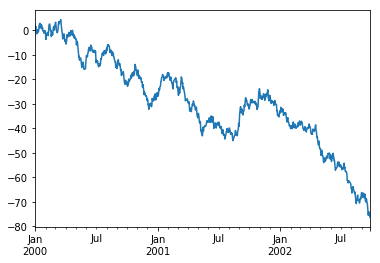

In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

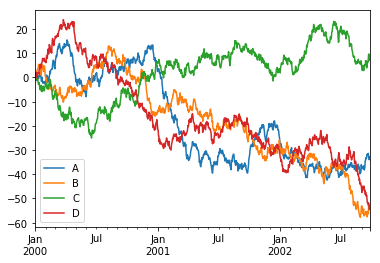

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure() 
df.plot()

### Plot Types
There are several plot types built-in to pandas, most of them statistical plots by nature:<br>
* df.plot.area <br>
* df.plot.barh <br>
* df.plot.density <br>
* df.plot.hist <br>
* df.plot.line <br>
* df.plot.scatter<br>
* df.plot.bar <br>
* df.plot.box <br>
* df.plot.hexbin <br>
* df.plot.kde <br>
* df.plot.pie<br>
You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)

#### Area Plot

You can create area plots with Series.plot.area() and DataFrame.plot.area(). Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

In [8]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.978544,0.920361,0.677839,0.303629
1,0.474662,0.697695,0.692964,0.266865
2,0.914668,0.038230,0.164093,0.603790
3,0.701867,0.895775,0.425237,0.520937
4,0.532320,0.942921,0.340101,0.467321
5,0.634484,0.634266,0.611772,0.680914
6,0.145778,0.311874,0.453018,0.135881
7,0.976433,0.936668,0.262613,0.993519
8,0.417143,0.359535,0.683703,0.121239
9,0.624933,0.149677,0.323608,0.798687


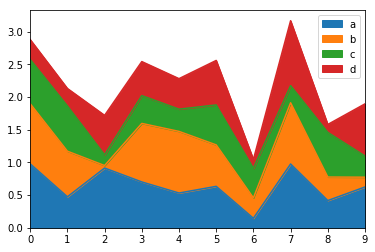

In [9]:
df.plot.area()

#### Bar plots
For labeled, non-time series data, you may wish to produce a bar plot:

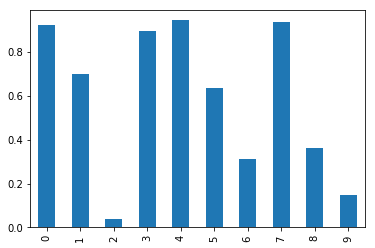

In [10]:
df['b'].plot.bar()

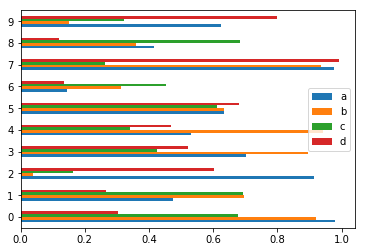

In [11]:
df.plot.barh()

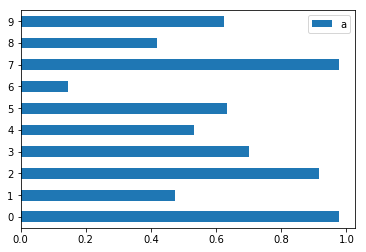

In [12]:
df.plot.barh(y='a')

### Density 
This method of plotting will be a lot easier to use than full-on matplotlib, it balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib plt. call.

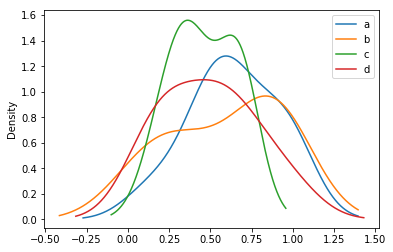

In [13]:
df.plot.density()

Generate Kernel Density Estimate plot using Gaussian kernels.

In statistics, `kernel density estimation`_ (KDE) is a non-parametric
way to estimate the probability density function (PDF) of a random
variable. This function uses Gaussian kernels and includes automatic
bandwith determination.

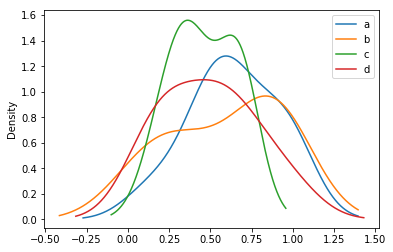

In [14]:
df.plot.kde()

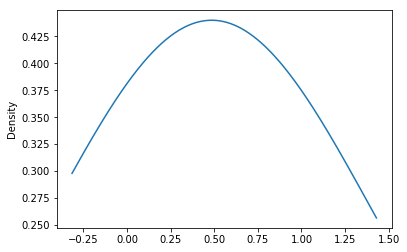

In [15]:
df['d'].plot.kde(bw_method=3)

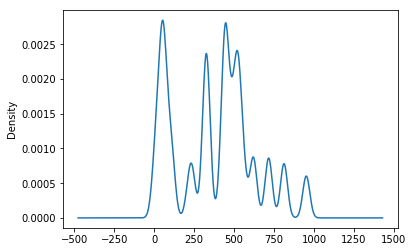

In [16]:
annual_data['NAICS'].plot.kde()

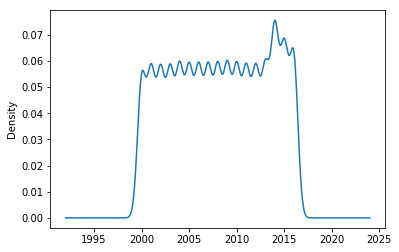

In [17]:
annual_data['Year'].plot.kde()

#### Histograms
Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

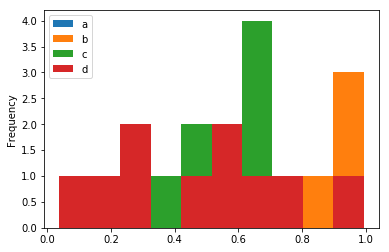

In [18]:
df.plot.hist(bins=10)

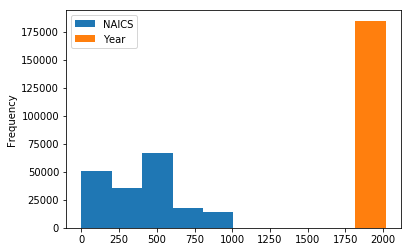

In [19]:
annual_data[['NAICS','Year']].plot.hist()

A histogram can be stacked using stacked=True. Bin size can be changed using the bins keyword.

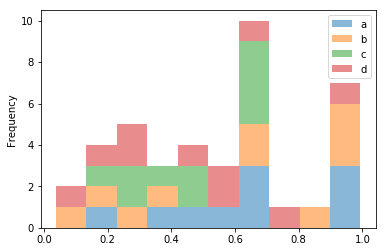

In [20]:
df.plot.hist(bins=10,alpha=0.53,stacked=True)

#### Line plot

This function is useful to plot lines using DataFrame's values
as coordinates.

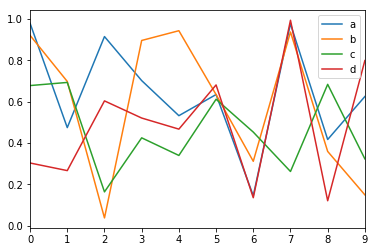

In [21]:
df.plot.line()

In [22]:
df1 = pd.DataFrame({
        'open': [2002.2, 1800.90, 4891.02, 6750.10, 17760.2],
        'close': [4000, 2500, 2810, 6000, 19000]
        }, index=[1990, 1997, 2003, 2009, 2014])

In [23]:
df1

,open,close
1990,2002.20,4000
1997,1800.90,2500
2003,4891.02,2810
2009,6750.10,6000
2014,17760.20,19000


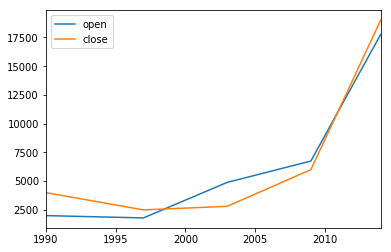

In [24]:
df1.plot.line()

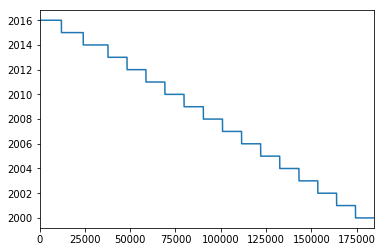

In [25]:
annual_data['Year'].plot.line()

#### Scatter plot
Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.

The coordinates of each point are defined by two dataframe columns and
filled circles are used to represent each point. This kind of plot is
useful to see complex correlations between two variables. Points could
be for instance natural 2D coordinates like longitude and latitude in
a map or, in general, any pair of metrics that can be plotted against
each other.



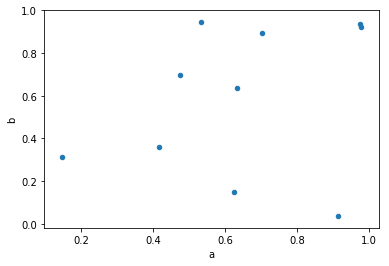

In [26]:
df.plot.scatter(x='a',y='b')

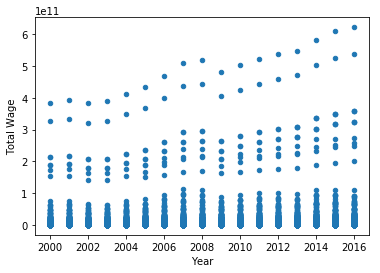

In [27]:
annual_data.plot.scatter(x='Year',y='Total Wage')

The keyword c may be given as the name of a column to provide colors for each point:

In [ ]:
annual_data.plot.scatter(x='Year',y='Total Wage',c='c')

In [ ]:
annual_data.plot.scatter(x='Total Wage',y='Average Employment',c='Year')

#### Hexbins plot
You can create hexagonal bin plots with DataFrame.plot.hexbin(). Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.


Generate a hexagonal binning plot of `x` versus `y`. If `C` is `None`
(the default), this is a histogram of the number of occurrences
of the observations at ``(x[i], y[i])``.

If `C` is specified, specifies values at given coordinates
``(x[i], y[i])``. These values are accumulated for each hexagonal
bin and then reduced according to `reduce_C_function`,
having as default the NumPy's mean function (:meth:`numpy.mean`).
(If `C` is specified, it must also be a 1-D sequence
of the same length as `x` and `y`, or a column label.)

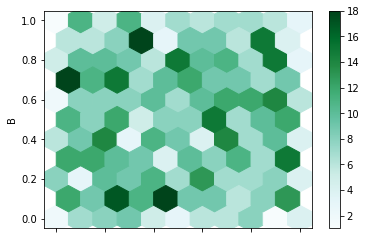

In [48]:
df2 = pd.DataFrame(np.random.rand(1000,2),columns=['A','B'])
df2.plot.hexbin(x='A',y='B',gridsize=10)

A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

#### Pie Plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.


A pie plot is a proportional representation of the numerical data in a
column. This function wraps :meth:`matplotlib.pyplot.pie` for the
specified column. If no column reference is passed and
``subplots=True`` a pie plot is drawn for each numerical column
independently.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000103994A8>],
      dtype=object)

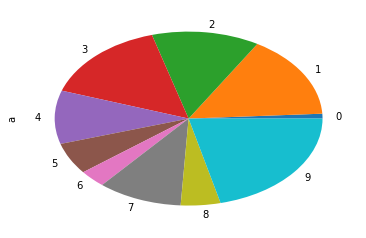

In [51]:
df['a'].plot.pie(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001073C2B0>,
      dtype=object)

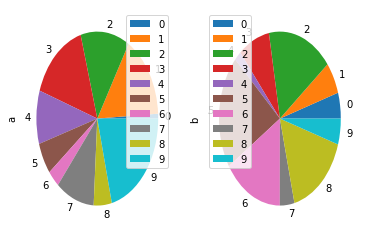

In [56]:
df[['a','b']].plot.pie(subplots=True)

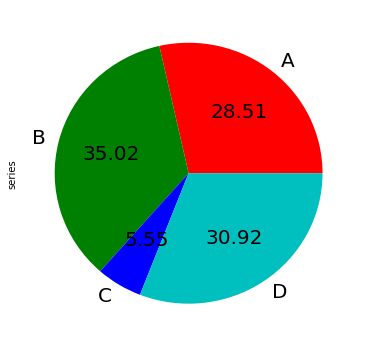

In [62]:
series= pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(labels=['A', 'B', 'C', 'D'], colors=['r', 'g', 'b', 'c'],
       autopct='%.2f', fontsize=20, figsize=(6, 6))

You can use the labels and colors keywords to specify the labels and colors of each wedge.

* Warning Most pandas plots use the label and color arguments (note the lack of “s” on those). To be consistent with matplotlib.pyplot.pie() you must use labels and colors. 

If you want to hide wedge labels, specify labels=None. If fontsize is specified, the value will be applied to wedge labels. Also, other keywords supported by matplotlib.pyplot.pie() can be used.

Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

  Plot Type   -----       NaN Handling       <br>
* Line	      -----       Leave gaps at NaNs<br>
* Line (stacked)-----	 Fill 0’s<br>
* Bar	        -----     Fill 0’s<br>
* Scatter	    -----     Drop NaNs<br>
* Histogram	    -----     Drop NaNs (column-wise)<br>
* Box	        -----     Drop NaNs (column-wise)<br>
* Area          -----   	 Fill 0’s<br>
* KDE	        -----     Drop NaNs (column-wise)<br>
* Hexbin        -----  	 Drop NaNs<br>
* Pie	        -----     Fill 0’s<br>
If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using fillna() or dropna() before plotting.